In [3]:
import sys
from pathlib import Path

project_root = Path("..").resolve()

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print("Project root added to sys.path:", project_root)


Project root added to sys.path: /Users/tharungopinath/Desktop/Q-A Agentic AI


In [4]:
from dotenv import load_dotenv
import os
load_dotenv()
print("GROQ_API_KEY loaded:", bool(os.getenv("GROQ_API_KEY")))


GROQ_API_KEY loaded: True


In [6]:
from agents.fact_detection import small_search_tool, is_factual

tests = [
    "What is Python?",
    "Who is the prime minister of India?",
    "Tell me a joke.",
    "Define AI",
    "population of India"
]

for t in tests:
    print("Query:", t)
    print(" is_factual:", is_factual(t))
    print(" tool result:", small_search_tool(t))
    print("---")

Query: What is Python?
 is_factual: True
 tool result: Python is a high-level, interpreted programming language known for readability.
---
Query: Who is the prime minister of India?
 is_factual: True
 tool result: As of your runtime environment, please check a live source. This local DB is only a demo.
---
Query: Tell me a joke.
 is_factual: False
 tool result: None
---
Query: Define AI
 is_factual: True
 tool result: Artificial Intelligence (AI) refers to machines performing tasks that typically require human intelligence.
---
Query: population of India
 is_factual: True
 tool result: None
---


In [7]:
from typing import Dict, Any
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

from agents.fact_detection import is_factual, small_search_tool



class State(TypedDict):
    messages: list


def tool_node(state: Dict[str, Any]) -> Dict[str, Any]:

    raw = state.get("messages", "")
    

    if isinstance(raw, list) and raw:
        query = str(raw[-1])
    else:
        query = str(raw)

    try:
        if is_factual(query):
            ans = small_search_tool(query)
            if ans:
                return {"messages": f"(tool) {ans}"}
            else:
                return {"messages": "(tool) no local fact found"}
    except Exception as e:
        return {"messages": f"(tool) error: {e}"}

    
    return {"messages": "(tool) not a factual query"}


Graph compiled


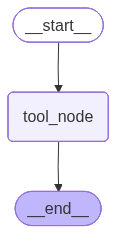

Saved toolbox_graph.png → static/


In [8]:

graph_builder = StateGraph(State)

graph_builder.add_node("tool_node", tool_node)
graph_builder.add_edge(START, "tool_node")
graph_builder.add_edge("tool_node", END)


try:
    tool_graph = graph_builder.compile()
except:
    tool_graph = graph_builder

print("Graph compiled")


from IPython.display import Image, display

try:
    png = tool_graph.get_graph().draw_mermaid_png()
    display(Image(png))


    from pathlib import Path
    out = Path("..") / "static"
    out.mkdir(exist_ok=True)
    (out / "toolbox_graph.png").write_bytes(png)
    print("Saved toolbox_graph.png → static/")
except Exception as e:
    print("Rendering failed:", e)
